<h1>Get Models Ready

In [1]:
%run Classifier.ipynb

c:\Users\diksh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\diksh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h1>Input

In [2]:
import tweepy
import snscrape.modules.twitter as sntwitter
import pandas as pd
from nltk.corpus import stopwords
import functools 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Load the stop words list
stop_words = set(stopwords.words('english'))

# Define a function to extract words from a text
def extract_words(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Remove non-alphabetic characters
    words = [word for word in words if word.isalpha()]
    return words

In [5]:
def get_tweets(username):
    query = "(from:" +username + ") until:2023-02-18 since:2010-01-01"
    tweets = []
    limit = 1000

    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limit:
            break
        else:
           #political or not code
           tweets.append(extract_words(tweet.content))
    
    return tweets

In [6]:
username = input("Enter Twitter user")
tweets = get_tweets(username)

C:\Users\diksh\AppData\Local\Temp\ipykernel_3992\1927189367.py:11: FutureWarning: content is deprecated, use rawContent instead
  tweets.append(extract_words(tweet.content))


In [7]:
userWords = []
for index,tweet in enumerate(tweets):
    for index2,word in enumerate(tweet):
        if word in wordbank:
            userWords.append(word)
            

userWordsDF = pd.DataFrame(userWords,columns = ['Tweets'])
userWordsEncoded = le.transform(userWordsDF["Tweets"])
userWordsEncodedDF = pd.DataFrame(userWordsEncoded,columns=['Tweets'])

<h1>Decision Tree


In [8]:
DecisionTreePred = stTreeEntropy.predict(userWordsEncodedDF)

In [9]:
DecisionTreePred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

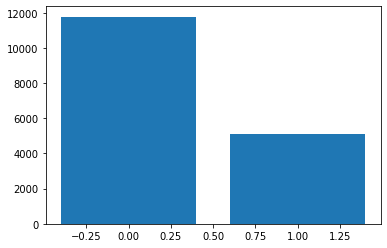

In [13]:
c_DT = Counter(DecisionTreePred)

plt.bar(c_DT.keys(), c_DT.values())
plt.show()

In [14]:
prob_DT = stTreeEntropy.predict_proba(userWordsEncodedDF)
prob_DT

array([[0.56994819, 0.43005181],
       [0.3076121 , 0.6923879 ],
       [0.39285714, 0.60714286],
       ...,
       [0.45714286, 0.54285714],
       [0.67079208, 0.32920792],
       [0.808     , 0.192     ]])

In [15]:
sum_prob_DT = 0
for i in range(len(DecisionTreePred)):
  a = DecisionTreePred[i]
  sum_prob_DT = sum_prob_DT + prob_DT[i][a]
prob_DT_final = sum_prob_DT/len(DecisionTreePred)

In [16]:
prob_DT_final

0.6377793519058107

In [17]:
print( " Estimated probability using Decision Tree is ",round(prob_DT_final*100),"%.\n", sep="" )

 Estimated probability using Decision Tree is 64%.



In [18]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
y_pred_DT = stTreeEntropy.predict(Features_test)

In [20]:
# Accuracy of Decision Tree
print("Accuracy:",metrics.accuracy_score(Target_test, y_pred_DT))

Accuracy: 0.623101120147307


In [21]:
DecisionTreePred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [22]:
Democrat_DT = 0
Republican_DT = 0

for item in DecisionTreePred:
    if item == 0:
        Democrat_DT +=1 
    else:
        Republican_DT +=1

In [23]:
Result_DT = (Democrat_DT - Republican_DT)/(Democrat_DT + Republican_DT)

print ("The final result is",(Result_DT)*10)

The final result is 3.9605426861780915


<h1> Naive Bayes

In [24]:
# naiveMethodPred = naiveMethod.predict(userWordsEncodedDF)

In [25]:
# naiveMethodPred

In [26]:
# Democrat = 0
# Republican = 0

# for item in naiveMethodPred:
#     if item == 0:
#         Democrat +=1 
#     else:
#         Republican +=1

In [27]:
# Result = (Democrat - Republican)/(Democrat + Republican)

# print ("The final result is",(Result)*10)

<h1>K Nearest Neighbors

In [28]:
knnMethodPred = knnMethod.predict(userWordsEncodedDF)

In [29]:
knnMethodPred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

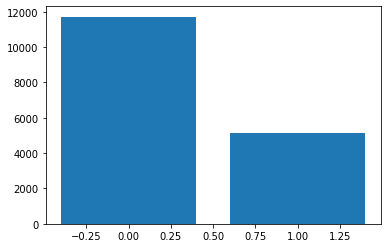

In [30]:
c_knn = Counter(knnMethodPred)

plt.bar(c_knn.keys(), c_knn.values())
plt.show()

In [31]:
prob_kNN = knnMethod.predict_proba(userWordsEncodedDF)
prob_kNN

array([[0.56435644, 0.43564356],
       [0.2970297 , 0.7029703 ],
       [0.38613861, 0.61386139],
       ...,
       [0.61386139, 0.38613861],
       [0.67326733, 0.32673267],
       [0.84158416, 0.15841584]])

In [32]:
sum_prob_kNN = 0
for i in range(len(knnMethodPred)):
  a = knnMethodPred[i]
  sum_prob_kNN = sum_prob_kNN + prob_kNN[i][a]
prob_kNN_final = sum_prob_kNN/len(knnMethodPred)

In [33]:
print( " Estimated probability using kNN is ",round(prob_kNN_final*100),"%.\n", sep="" )

 Estimated probability using kNN is 62%.



In [34]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knnMethod.score(Features_train, Target_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knnMethod.score(Features_test, Target_test)))

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.60


In [35]:
Democrat_KP = 0
Republican_KP = 0

for item in knnMethodPred:
    if item == 0:
        Democrat_KP +=1 
    else:
        Republican_KP +=1

In [36]:
Result_KP = (Democrat_KP - Republican_KP)/(Democrat_KP + Republican_KP)

print ("The final result is",(Result_KP)*10)

The final result is 3.8870786184015644


<h1> AdaBoost (with DecisionTree)

In [37]:
adaMethodPred = abc2.predict(userWordsEncodedDF)

In [38]:
adaMethodPred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

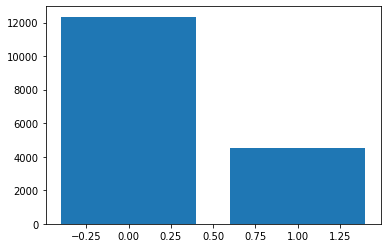

In [39]:
c_ada = Counter(adaMethodPred)

plt.bar(c_ada.keys(), c_ada.values())
plt.show()

In [40]:
prob_ada = abc2.predict_proba(userWordsEncodedDF)
prob_ada

array([[0.50070037, 0.49929963],
       [0.49775165, 0.50224835],
       [0.49877283, 0.50122717],
       ...,
       [0.50112845, 0.49887155],
       [0.50146511, 0.49853489],
       [0.50355943, 0.49644057]])

In [41]:
sum_prob_ada = 0
for i in range(len(adaMethodPred)):
  a = adaMethodPred[i]
  sum_prob_ada = sum_prob_ada + prob_ada[i][a]
prob_ada_final = sum_prob_ada/len(adaMethodPred)

In [42]:
print( " Estimated probability using AdaBoost is ",round(prob_ada_final*100),"%.\n", sep="" )

 Estimated probability using AdaBoost is 50%.



In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
#Accuracy
y_pred_ada = abc2.predict(Features_test)

print("\n")
conMat = confusion_matrix(Target_test, y_pred_ada)
print(conMat)
print("\n")

print( accuracy_score(Target_test, y_pred_ada) )



[[70553 25317]
 [47423 39183]]


0.6013722352528552


In [45]:
Democrat_AP = 0
Republican_AP = 0

for item in adaMethodPred:
    if item == 0:
        Democrat_AP +=1 
    else:
        Republican_AP +=1

In [46]:
Result_AP = (Democrat_AP - Republican_AP)/(Democrat_AP + Republican_AP)

print ("The final result is",(Result_AP)*10)

The final result is 4.630013626399668


<h1> Neural Network

In [47]:
#annMethodPred = classifier.predict(userWordsEncodedDF)

In [48]:
#annMethodPred

In [49]:
# array_result = []
# for i in range(len(annMethodPred)):
#   if annMethodPred[i][0] >= 0.5:
#     array_result.append(1)
#   else:
#     array_result.append(0)
# Democrat_Neural = 0
# Republican_Neural = 0


# for item in array_result:
#     if item == 0:
#         Democrat_Neural +=1 
#     else:
#         Republican_Neural +=1
# Result_Neural = (Democrat_Neural - Republican_Neural)/(Democrat_Neural + Republican_Neural)
# print ("The final result is",(Result_Neural)*10)